In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


## Variables

In [36]:
t_entre_cajas = 15;

# materiales [ancho, largo, espesor, densidad]
gres_simple      = [60 , 60 , 0.95 , 1.92]
gres_pulido      = [60 , 60 , 0.95 , 1.92]
gres_tecnificado = [60 , 60 , 0.95 , 1.92]

## Funciones

In [37]:
def perfilTrapezoidal(t_aceleracion, velocidad_max, offset, t_total):
    aceleracion = velocidad_max / t_aceleracion
    t_crucero = t_total - 2 * t_aceleracion
    t = np.linspace(0, t_total, 1000)
    perfil = np.zeros(t.shape)

    # Formado de caja (Tramo 1)
    i_aceleracion = (t >= offset) & (t <= offset + t_aceleracion)
    perfil[i_aceleracion] = aceleracion * (t[i_aceleracion] - offset)

    i_crucero = (t > offset + t_aceleracion) & (t <= (offset + t_aceleracion + t_crucero))
    perfil[i_crucero] = velocidad_max

    i_desaceleracion = (t > (offset + t_aceleracion + t_crucero)) & (t <= t_total)
    perfil[i_desaceleracion] = velocidad_max - aceleracion * (t[i_desaceleracion] - (t_aceleracion + t_crucero) - offset)
    print(aceleracion)
    return perfil

## Trayecto


6.783185307179586


Text(0.5, 0, 'Tiempo [s]')

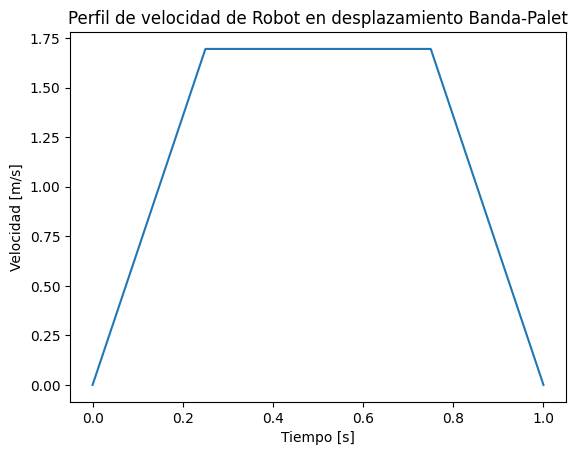

In [38]:
t_trayecto = 1            # segundos
t_aceleracion = 0.25
dist_trabajo = 2          # metros
desplazamiento_arco = dist_trabajo*math.pi/4
aceleracion_min = 4*desplazamiento_arco/math.pow(t_trayecto,2)
aceleracion_nom = aceleracion_min + 0.5
velocidad_max = aceleracion_nom*t_aceleracion
perfil = perfilTrapezoidal(t_aceleracion, velocidad_max, 0, t_trayecto)
vector_tiempo = np.linspace(0, t_trayecto, len(perfil))

# Gráfica
plt.plot(vector_tiempo,perfil)
plt.title("Perfil de velocidad de Robot en desplazamiento Banda-Palet")
plt.ylabel("Velocidad [m/s]")
plt.xlabel("Tiempo [s]")


## Masas

In [52]:
materiales = np.zeros((3,7))
materiales[:, :4] = [gres_simple, gres_pulido, gres_tecnificado]
#Cálculo de área de cada baldosa
materiales[:,4]  = materiales[:,0]*materiales[:,1]
# Cálculo de masas unitarias m = area * espesor * densidad (masa de caja = masa unitaria *6)
materiales[:,5] = materiales[:,4]*materiales[:,2]*materiales[:,3]/1000
materiales[:,6] = materiales[:,5]*6
materiales = pd.DataFrame(materiales)

indice = ["Gres simple", "Gres pulido", "Gres tecnificado"]
columnas = ["Ancho [cm]", "Largo [cm]", "Espesor [cm]", "Densidad [g/cm^3]", "Área [cm^2]", "Masa unitaria [kg]", "Masa total de caja [kg]"]
materiales.set_index(pd.Index(indice), inplace=True)
materiales.columns = columnas
materiales

,Ancho [cm],Largo [cm],Espesor [cm],Densidad [g/cm^3],Área [cm^2],Masa unitaria [kg],Masa total de caja [kg]
Gres simple,60.0,60.0,0.95,1.92,3600.0,6.5664,39.3984
Gres pulido,60.0,60.0,0.95,1.92,3600.0,6.5664,39.3984
Gres tecnificado,60.0,60.0,0.95,1.92,3600.0,6.5664,39.3984


## Fuerzas

In [56]:
# La máxima fuerza que hará el robot se calcula con la aceleración máxima que alcanzará

Fuerza = materiales.iloc[1,6]*aceleracion_nom

267.2466480063842